### Nouran Ahmed Abd Elhameed Mohamed
### Task 6 (The Sparks Foundation Internship) 
### Create The Decision Tree Classifer and visualize it graphically

### all the pacakges needed to import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Read the dataset

In [4]:
data = pd.read_csv("iris.csv",index_col=0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Preprocessing Data (Check if there is any NULL or Duplicate Data)

### As we can see we checked over if there is any null records and the result is false so we needn't to do anything 

In [5]:
data.isnull().values.any()


False

### As we can see we checked over if there is any duplicate records and the result is true and there is 3 records are duplicated so i dropped any duplicate record

In [6]:
data.duplicated().values.any()

True

In [7]:
data.duplicated().values.sum()


3

In [8]:
data.drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Encoded The target from labels into values 
### 0 for Iris-setosa, 1 for Iris-versicolor and 2 for Iris-virginica 

In [9]:
encoded_data = LabelEncoder().fit_transform(data['Species'])
encoded_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Show the correaltion between the features ranges from (-1 to +1)
### from lighter color (values closer to zero) we interpert there is no correlation between features as we go close to positive 1 there a strong positive correlation between the features (as one increases so does the other) and close to -1 is a strong negative correlation (as one increases the other decrease)
### at the diagonal are all 1 because the features correalted to itself

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

<AxesSubplot:>

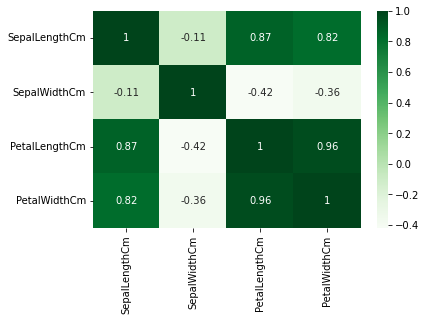

In [11]:
correlated_features=data.corr()
sns.heatmap(correlated_features,cmap='Greens',annot=True)